## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

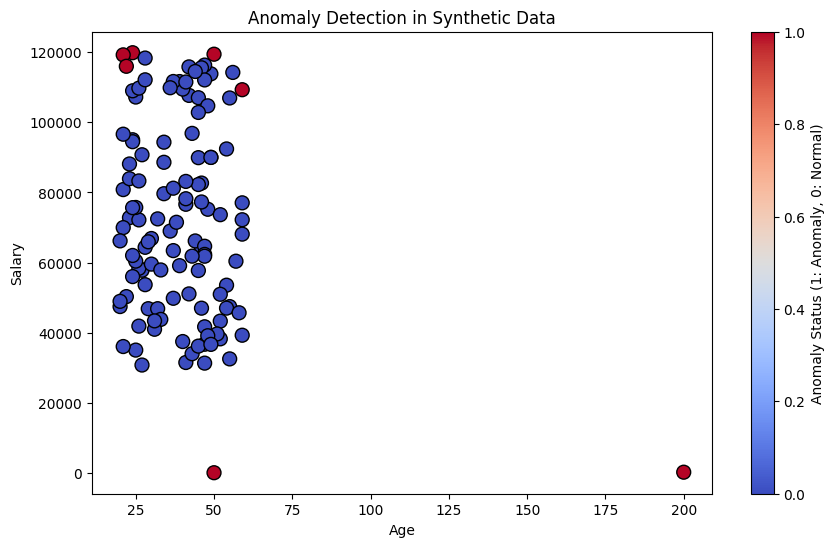

INFO:root:Results saved to anomalies_detected.csv
INFO:root:Anomaly detection pipeline executed successfully.


Exiting the environment gracefully...


In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import warnings
import logging

# Suppress warnings (UserWarnings)
warnings.filterwarnings("ignore", category=UserWarning)

# Logging configuration
logging.basicConfig(level=logging.INFO)

# Function to generate synthetic data
def generate_synthetic_data(size=120):
    """Generate synthetic data with anomalies."""
    try:
        # Generating random data
        ages = np.random.randint(20, 60, size)
        salaries = np.random.randint(30000, 120000, size)

        # Adding anomalies
        anomalies = np.array([50, 200])  # example anomalies
        ages = np.concatenate((ages, anomalies))
        salaries = np.concatenate((salaries, anomalies))

        # Create DataFrame
        df = pd.DataFrame({'age': ages, 'salary': salaries})

        return df

    except Exception as e:
        logging.error(f"Error generating synthetic data: {e}")
        raise

# Function to detect anomalies using IsolationForest
def detect_anomalies(df):
    """Detect anomalies using Isolation Forest."""
    try:
        # Validate that the columns are numeric
        if not np.issubdtype(df['age'].dtype, np.number) or not np.issubdtype(df['salary'].dtype, np.number):
            raise ValueError("Both 'age' and 'salary' columns must be numeric.")

        # Initialize Isolation Forest
        model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
        
        # Fit the model and predict anomalies
        model.fit(df[['age', 'salary']])
        df['anomaly_score'] = model.decision_function(df[['age', 'salary']])
        df['is_anomaly'] = model.predict(df[['age', 'salary']])

        # Map predictions to 1 (anomaly) and 0 (normal)
        df['is_anomaly'] = df['is_anomaly'].map({1: 0, -1: 1})
        return df

    except ValueError as e:
        logging.error(f"Data validation error: {e}")
        raise
    except Exception as e:
        logging.error(f"Error during anomaly detection: {e}")
        raise

# Function to visualize the anomalies
def visualize_anomalies(df):
    """Visualize anomalies in the dataset."""
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['age'], df['salary'], c=df['is_anomaly'], cmap='coolwarm', edgecolors='k', s=100)
        plt.xlabel('Age')
        plt.ylabel('Salary')
        plt.title('Anomaly Detection in Synthetic Data')
        plt.colorbar(label='Anomaly Status (1: Anomaly, 0: Normal)')
        plt.show()
    except Exception as e:
        logging.error(f"Error during visualization: {e}")
        raise

# Function to save results to a CSV file
def save_results(df, filename="anomalies_detected.csv"):
    """Save the results to a CSV file."""
    try:
        df.to_csv(filename, index=False)
        logging.info(f"Results saved to {filename}")
    except Exception as e:
        logging.error(f"Error saving results: {e}")
        raise

# Main function to handle the entire pipeline
def run_anomaly_detection_pipeline(data_size=120):
    """Run the full anomaly detection pipeline."""
    try:
        # Generate data
        df = generate_synthetic_data(data_size)

        # Detect anomalies
        df = detect_anomalies(df)

        # Visualize anomalies
        visualize_anomalies(df)

        # Save results
        save_results(df)

        logging.info("Anomaly detection pipeline executed successfully.")
    
    except Exception as e:
        logging.error(f"Anomaly detection pipeline failed: {e}")
        raise

# Gracefully exit the Python script or environment
def graceful_exit():
    """Exit the environment gracefully."""
    print("Exiting the environment gracefully...")
    exit()

# Run the pipeline
if __name__ == "__main__":
    try:
        run_anomaly_detection_pipeline()
    except Exception as e:
        logging.error(f"An error occurred in the pipeline: {e}")

    graceful_exit()


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [ ]:
# write your code from here
# Task 2: Using clustering algorithms to detect duplicate records
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

# Sample data (can be replaced with actual dataset)
data = {
    'name': ['John Doe', 'Jon Doe', 'Jane Smith', 'Janet Smith', 'Jake Peralta'],
    'address': ['123 Elm St', '123 Elm Street', '456 Oak Rd', '456 Oak Road', '789 Pine St']
}
df = pd.DataFrame(data)

# Combine relevant fields for similarity comparison
df['combined'] = df['name'] + ' ' + df['address']

# Vectorize text
vectorizer = TfidfVectorizer().fit_transform(df['combined'])
similarity_matrix = cosine_similarity(vectorizer)

# Clustering based on similarity
clustering = DBSCAN(eps=0.3, min_samples=1, metric='precomputed')
labels = clustering.fit_predict(1 - similarity_matrix)

df['cluster'] = labels

# View clustered potential duplicates
print("Clustered records (possible duplicates):")
display(df.sort_values(by='cluster'))


ValueError: Negative values in data passed to X.

: 

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [ ]:
# write your code from here
# Task 3: Implementing classification to validate data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Example labeled dataset
data = {
    'age': [25, 120, -5, 35, 45],
    'income': [50000, 100000, 40000, -1000, 70000],
    'label': [1, 0, 0, 0, 1]  # 1: valid, 0: invalid
}
df_val = pd.DataFrame(data)

# Split into features and labels
X = df_val[['age', 'income']]
y = df_val['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'pd' is not defined